# Bildverarbeitung mit Python
Gert-Ludwig Ingold
<div style="margin-top:10ex;font-size:smaller">Quellen: `git clone https://github.com/gertingold/lit2017`</div>

## Bearbeitung digitaler Bilder unter Linux

 * `darktable`
 * `gimp`
 * ...
 * **hier:** `Python`  
   * skriptbasiert, hohe Reproduzierbarkeit
   * Möglichkeit zur Inspektion des Codes in frei verfügbaren Programmbibliotheken
   * Möglichkeit zum freien Experimentieren
   * Bearbeitung von größeren Bildmengen
   * Auswertung wissenschaftlicher Bilder

## Digitale Bilder sind numerische Daten
![Digitale Bilder als Arrays](img/imagearrays.png)

→ verwende ndarray von NumPy

## Pythons wissenschaftliches Ökosystem

 1. **NumPy**  
    stellt Arrays und die zugehörige Funktionalität zur Verfügung  
    bildet die Basis für alle weiteren Pakete
 2. **SciPy**  
    umfangreiche wissenschaftliche Programmbibliothek  
    bietet auch grundlegende Unterstützung für Bildverarbeitung
 3. **Matplotlib**  
    wird hier zur Darstellung der Bilder benutzt
 4. **Scikit Image**  
    Scikits sind spezialisierte Erweiterungen zu SciPy  
    Scikit Image konzentriert sich auf die Bildverarbeitung
 5. **+ ...**

### SciPy Lecture Notes
#### `www.scipy-lectures.org`
![foo](img/ScipyLectCover.png)

* Verwendete Pakete
  * `NumPy` und `SciPy`  
    http://scipy.org
  * `matplotlib`  
    http://matplotlib.org
  * `scikit-image`  
    http://scikit-image.org

* Die Quellen aller Pakete sind auf Github verfügbar.

* Python-Distribution mit allem was man hier braucht:
  * `Anaconda`  
    http://continuum.io

### Die Zutaten

In [1]:
%matplotlib inline
import numpy as np
from scipy import misc, ndimage
import matplotlib as mpl
import matplotlib.pyplot as plt
from skimage import (color, data, draw, exposure, filters, measure,
                     morphology, transform)

### Unser Wegbegleiter

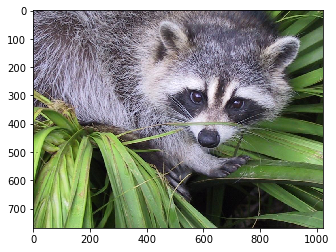

In [2]:
plt.imshow(misc.face())

## Speichern und Lesen eines Bildes

In [3]:
misc.imsave('face.png', misc.face())

### Bilddaten im PNG-Format

In [4]:
with open('face.png', 'rb') as file:
    print(file.read(20))

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00'


### Bilddaten als NumPy-Array

In [5]:
waschbär = misc.imread('face.png')

In [6]:
type(waschbär)

numpy.ndarray

In [7]:
waschbär.shape

(768, 1024, 3)

In [8]:
waschbär

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ..., 
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ..., 
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ..., 
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ..., 
       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ..., 
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ..., 
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ..., 
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,

## Schwarz-Weiß-Bilder

In [9]:
waschbär_sw = misc.face(gray=True)

In [10]:
waschbär_sw.shape

(768, 1024)

In [11]:
waschbär_sw

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ..., 
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

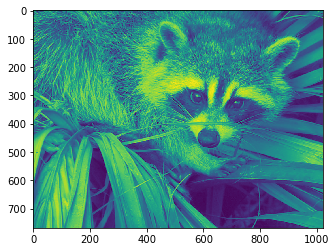

In [12]:
plt.imshow(waschbär_sw)

Standardfarbskala von Matplotlib: `cm.viridis`

für Schwarz-Weiß-Bilder besser: `cm.gray`

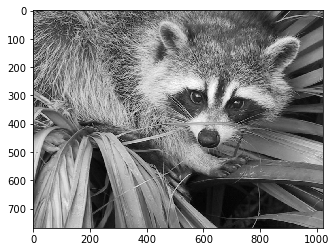

In [13]:
plt.imshow(waschbär_sw, cmap=plt.cm.gray)

## Bearbeitung mit Standard-NumPy-Methoden

### Rahmung eines Bildes

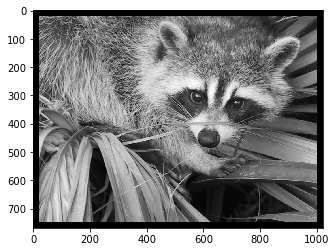

In [14]:
gerahmtes_bild = np.zeros_like(waschbär_sw)
rand = 20
gerahmtes_bild[rand:-rand, rand:-rand] = waschbär_sw[rand:-rand, rand:-rand]
plt.imshow(gerahmtes_bild, cmap=plt.cm.gray)

* mit Nullen gefülltes Array bedeutet schwarze Fläche
* Einblenden eines Teilbildes unter Verwendung der Slicing-Syntax  
  (vergleiche Slicing bei Python-Listen)

### Veränderung des Farbtons

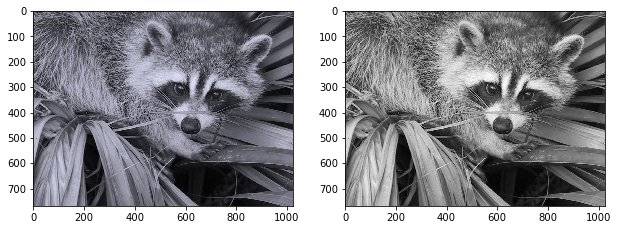

In [15]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10.24, 7.68))
ax0.imshow(np.array(waschbär_sw[:, :, np.newaxis]*np.array([0.9, 0.9, 1.0]),
                    dtype=np.uint8))
ax1.imshow(waschbär_sw, cmap=plt.cm.gray)

* Schwarz-Weiß-Bild wird in Farbbild umgewandelt  
  → eine dritte Achse muss hinzugefügt werden (`np.newaxis`)
* NumPy Broadcasting: der RGB-Wert wird in die dritte Achse eingefügt  
  → Verstärkung des Blaukanals im Vergleich zum rechten Originalbild

### Maskierung eines Bildes

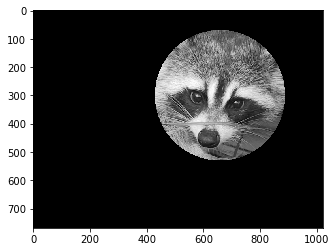

In [16]:
maskierter_waschbär = waschbär_sw[:, :]
centerx, centery = 660, 300
radius = 230
sy, sx = waschbär_sw.shape
y, x = np.ogrid[:sy, :sx]
maske = ((y-centery)**2 + (x-centerx)**2) > radius**2
maskierter_waschbär[maske] = 0
plt.imshow(maskierter_waschbär, cmap=plt.cm.gray)

* Maske enthält Wahrheitswerte  
  `True`: Punkt liegt außerhalb des gewählten Kreises  
  `False`: Punkt liegt innerhalb des gewählten Kreises
* Adressierung mit booleschem Array (`maske`)

### Maskierung mit Scikit Image

#### Beispiel: Ellipse

In [17]:
help(draw.ellipse)

Help on function ellipse in module skimage.draw.draw:

ellipse(r, c, yradius, xradius, shape=None)
    Generate coordinates of pixels within ellipse.
    
    Parameters
    ----------
    r, c : double
        Centre coordinate of ellipse.
    yradius, xradius : double
        Minor and major semi-axes. ``(x/xradius)**2 + (y/yradius)**2 = 1``.
    shape : tuple, optional
        Image shape which is used to determine the maximum extent of output pixel
        coordinates. This is useful for ellipses which exceed the image size.
        By default the full extent of the ellipse are used.
    
    Returns
    -------
    rr, cc : ndarray of int
        Pixel coordinates of ellipse.
        May be used to directly index into an array, e.g.
        ``img[rr, cc] = 1``.
    
    Examples
    --------
    >>> from skimage.draw import ellipse
    >>> img = np.zeros((10, 10), dtype=np.uint8)
    >>> rr, cc = ellipse(5, 5, 3, 4)
    >>> img[rr, cc] = 1
    >>> img
    array([[0, 0, 0, 0, 0, 0,

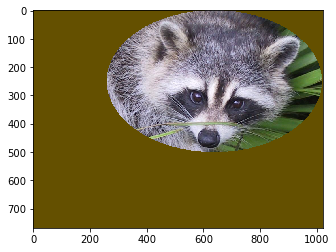

In [18]:
maskierter_waschbär = np.ones_like(waschbär)*np.array([100, 80, 0], dtype=np.uint8)
e_rr, e_cc = draw.ellipse(250, 640, 250, 380, shape=waschbär.shape)
maskierter_waschbär[e_rr, e_cc, :] = waschbär[e_rr, e_cc, :]
plt.imshow(maskierter_waschbär)

## Transformationen

* aus `scipy.ndimage`
* interpoliert bei Bedarf

### Verschiebung

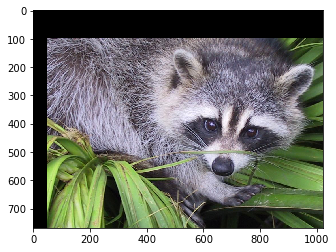

In [19]:
plt.imshow(ndimage.shift(waschbär, (100, 50, 0)))

### Zoom

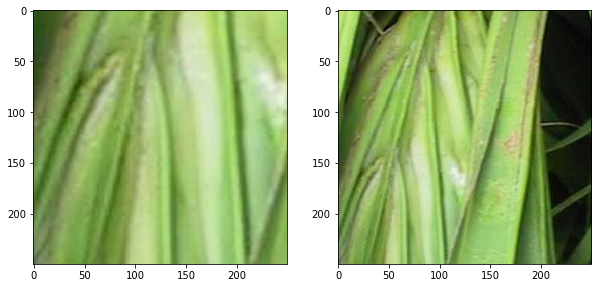

In [20]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 10))
ax0.imshow(ndimage.zoom(waschbär, (2, 2, 1))[-250:, :250])
ax1.imshow(waschbär[-250:, :250])

### Drehung

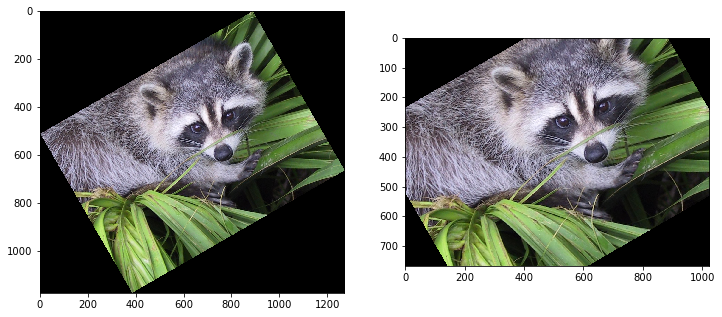

In [21]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 8))
ax0.imshow(ndimage.rotate(waschbär, 30))
ax1.imshow(ndimage.rotate(waschbär, 30, reshape=False))

### Stürzende Linien

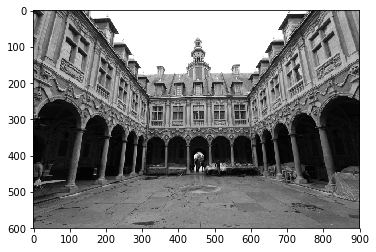

In [22]:
lille = misc.imread('img/lille.png')
plt.imshow(lille, cmap=plt.cm.gray)

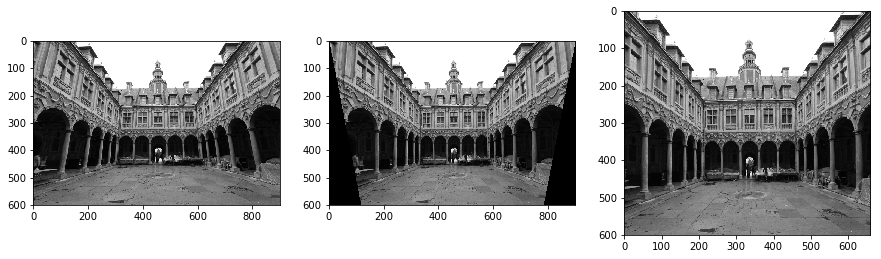

In [23]:
def mapfunc(output_coords, *args):
    xp, yp = output_coords
    xmax, ymax = args[0]
    fak = args[1]
    yorig = (yp-(1-fak)*xp/xmax*0.5*ymax)/(fak+(1-fak)*(1-xp/xmax))
    return (xp, yorig)

lille_trafo = ndimage.geometric_transform(lille, mapping=mapfunc,
                                          extra_arguments=(lille.shape, 0.74))

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 8))
ax0.imshow(lille, cmap=plt.cm.gray)
ax1.imshow(lille_trafo, cmap=plt.cm.gray)
ax2.imshow(lille_trafo[:, 120:780], cmap=plt.cm.gray)

### Der exponentierte Waschbär

$u+\mathrm{i}v = \mathrm{e}^{x+\mathrm{i}y}$

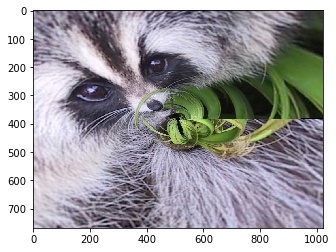

In [24]:
def mapfunc(output_coords, *args):
    xp, yp, zp = output_coords
    xmax, ymax, _ = args[0]
    xp = 3-6*xp/xmax
    yp = 3-6*yp/ymax
    xorig = 0.5*xmax*(1-np.log(xp**2+yp**2+1e-12)/(2*np.pi))
    yorig = 0.5*ymax*(1+np.arctan2(xp, yp)/np.pi)
    return (xorig, yorig, zp)

plt.imshow(ndimage.geometric_transform(waschbär, mapping=mapfunc,
                                       extra_arguments=(waschbär.shape,)))

### Bestimmung der Transformationsparameter mit Hilfe von Scikit Image

* Rückgängigmachung einer projektiven Verzerrung

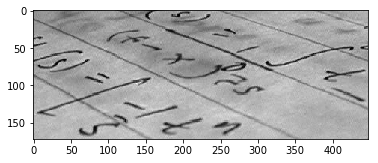

In [25]:
text = data.text()
plt.imshow(text, cmap=plt.cm.gray)

* Festlegung von Referenzpunkten

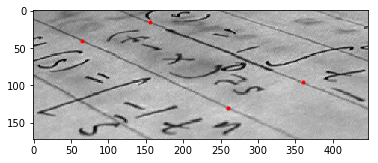

In [26]:
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])
plt.imshow(text, cmap=plt.cm.gray)
plt.plot(dst[:, 0], dst[:, 1], '.r')

* Festlegung der Bildpunkte
* Durchführung der Transformation

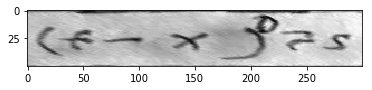

In [27]:
src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])

tform = transform.ProjectiveTransform()
tform.estimate(src, dst)
warped = transform.warp(text, tform, output_shape=(50, 300))

plt.imshow(warped, cmap=plt.cm.gray)

## Farbmarkierung von Bildelementen

#### Verteilung der Farbkanäle

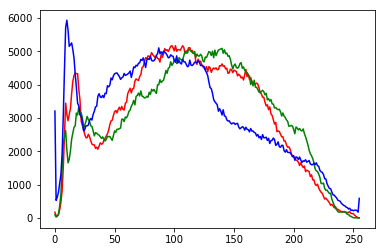

In [28]:
for column, farbe in enumerate(('r', 'g', 'b')):
    histogramm = ndimage.histogram(waschbär[:, :, column],
                                   min=0, max=255, bins=256)
    plt.plot(histogramm, farbe)

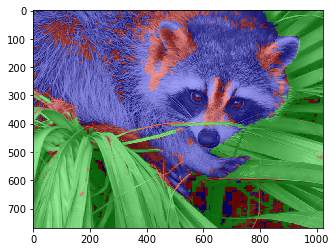

In [29]:
label = np.zeros(shape=waschbär.shape[:2])
label[np.logical_and(waschbär[:, :, 1] > waschbär[:, :, 0],
                     waschbär[:, :, 1] > waschbär[:, :, 2])] = 1
label[np.logical_and(waschbär[:, :, 2] > waschbär[:, :, 0],
                     waschbär[:, :, 2] > waschbär[:, :, 1])] = 2
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]
rgb = color.colorlabel.label2rgb(label, image=waschbär,
                                 colors=colors, alpha=0.35, image_alpha=1)
plt.imshow(rgb)

## Messung von Farbabständen

* Umwandlung in den Lab-Farbraum

In [30]:
grün = color.colorconv.rgb2lab(np.array([0, 255, 0], dtype=np.uint8
                                        ).reshape(1, 1, 3))

In [31]:
waschbär_lab = color.colorconv.rgb2lab(waschbär)

* Bestimmung des Farbabstands zur Referenzfarbe

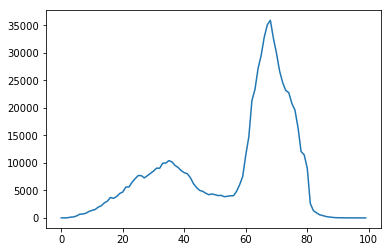

In [32]:
diff = color.delta_e.deltaE_cie76(waschbär_lab, grün)
plt.plot(ndimage.histogram(diff, min=np.min(diff), max=np.max(diff), bins=100))

* Entfernung grüner Bildbereiche

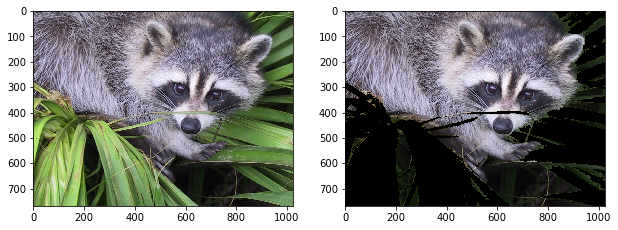

In [33]:
schwelle = 115
waschbär_ohne_grün = np.zeros_like(waschbär)
waschbär_ohne_grün[diff > schwelle] = waschbär[diff > schwelle]
fig1, (ax0, ax1) = plt.subplots(1, 2, figsize=(10.24, 7.68))
ax0.imshow(waschbär)
ax1.imshow(waschbär_ohne_grün)

## Segmentierung eines Bildes

siehe auch Scikit Image Gallery (http://scikit-image.org/docs/dev/auto_examples/)

* Das Ausgangsbild

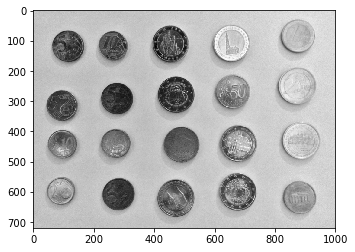

In [34]:
münzen = misc.imread('img/euro_real.jpg')
plt.imshow(münzen, cmap=plt.cm.gray)

* Grauwerthistogramm
* in unserem Fall gibt es Münzen mit gutem Kontrast zum Hintergrund und solche mit schlechtem Kontrast

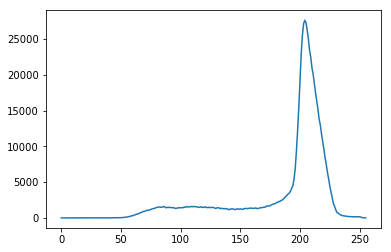

In [35]:
plt.plot(ndimage.histogram(münzen, min=0, max=255, bins=256))

* Umwandlung in ein binäres Scharz-Weiß-Bild mit der Otsu-Methode
* ideal wäre eine zweigipflige Verteilung der Grauwerte, die wir hier allerdings nicht wirklich haben
* bei einigen Münzen sind Probleme zu erwarten

157


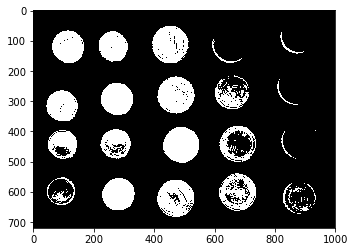

In [36]:
schwelle = filters.threshold_otsu(münzen)
print(schwelle)
münzen_sw = münzen < schwelle
plt.imshow(münzen_sw, cmap=plt.cm.gray)

* Ausfüllen von Fehlflächen
* Gefahr von Artefakten

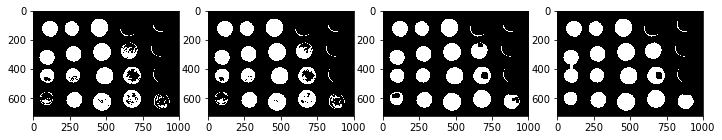

In [37]:
größe = (3, 5, 20, 30)
fig, achsen = plt.subplots(1, len(größe), figsize=(12, 8))
for achse, g in zip(achsen, größe):
    achse.imshow(morphology.closing(münzen_sw, morphology.square(g)),
                 cmap=plt.cm.gray)

In [38]:
münzen_sw_20 = morphology.closing(münzen_sw, morphology.square(20))
label_münzen = measure.label(münzen_sw_20)
münzen_label_overlay = color.label2rgb(label_münzen, image=münzen)

* Einfärben von Münzen gemäß der vergegebenen Labels
* nur hinreichend große Gebiete werden berücksichtigt

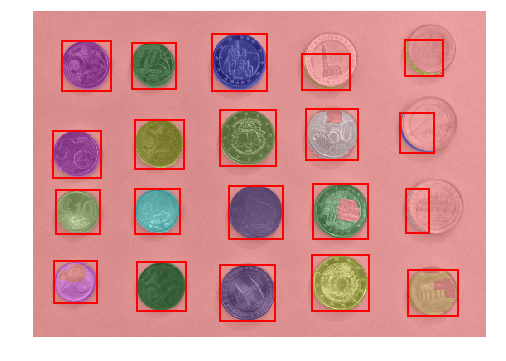

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(münzen_label_overlay)

for region in measure.regionprops(label_münzen):
    if region.area >= 100:
        minr, minc, maxr, maxc = region.bbox
        rect = mpl.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.show()